In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

ModuleNotFoundError: No module named 'pandas'

In [2]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 11.5/11.5 MB 65.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 12.6/12.6 MB 65.8 MB/s eta 0:00:00


In [3]:
import pandas as pd

In [5]:
!pip install seaborn

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 68.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 48.8 MB/s eta 0:00:00


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math

In [8]:
df = pd.read_csv('C:\Users\kjmat\Desktop\interview britevox\kaggle\Netflix Userbase.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1830707393.py, line 1)

In [9]:
df = pd.read_csv(r'C:\Users\kjmat\Desktop\interview britevox\kaggle\Netflix Userbase.csv')

In [10]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [11]:
df.duplicated().sum()


np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

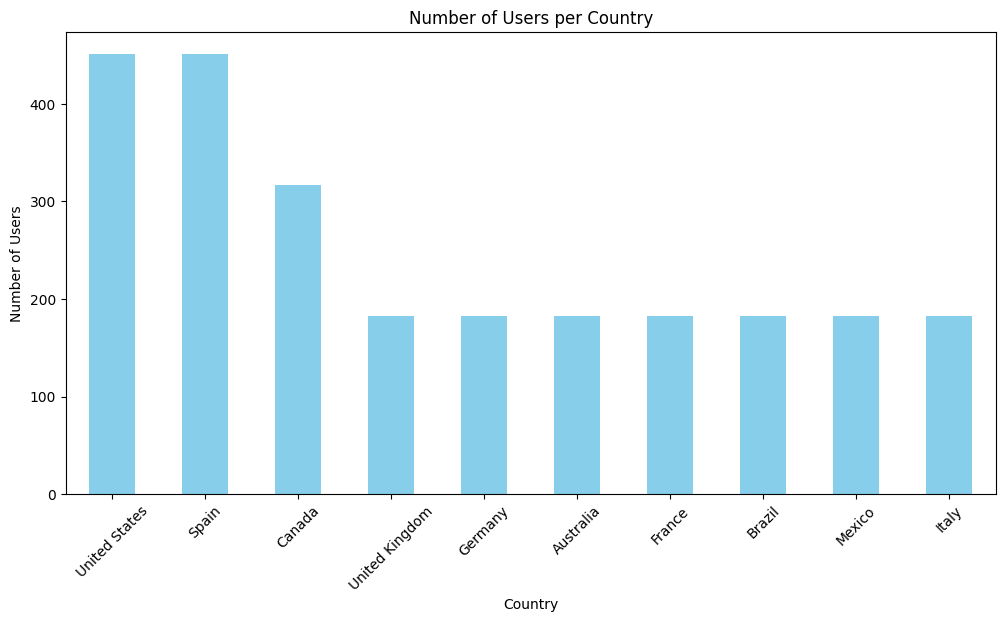

In [14]:
plt.figure(figsize=(12,6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Users per Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show() 

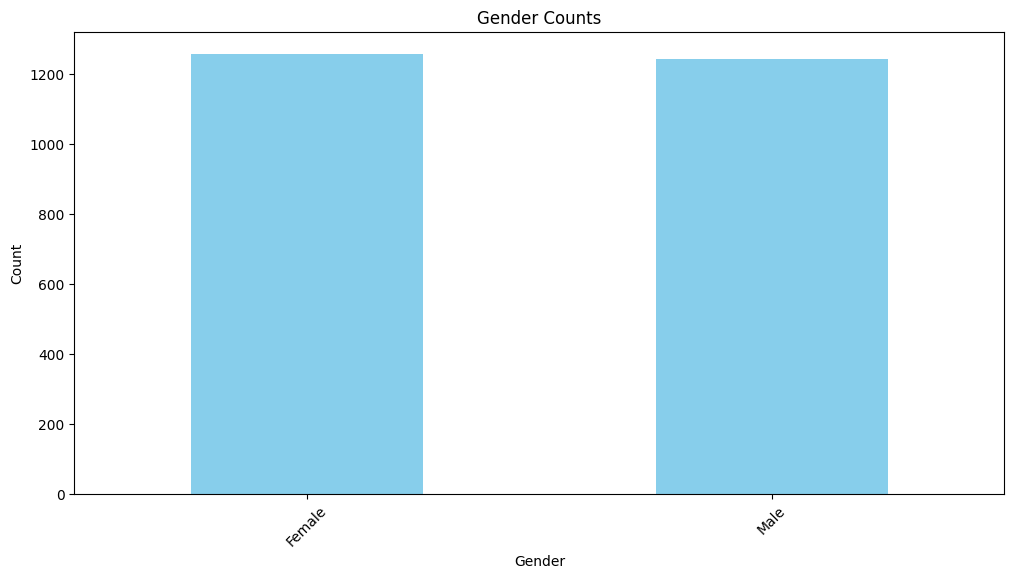

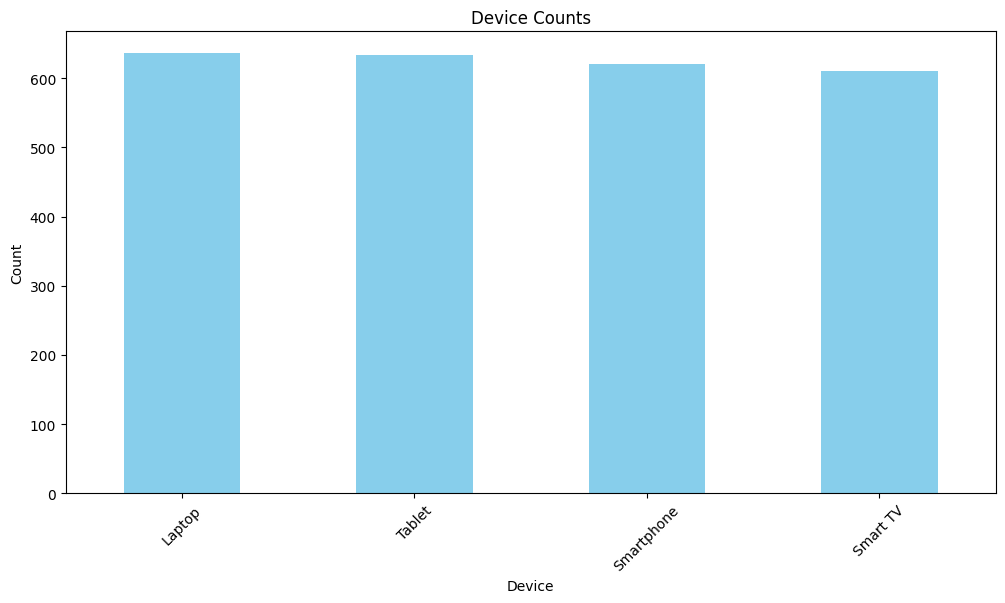

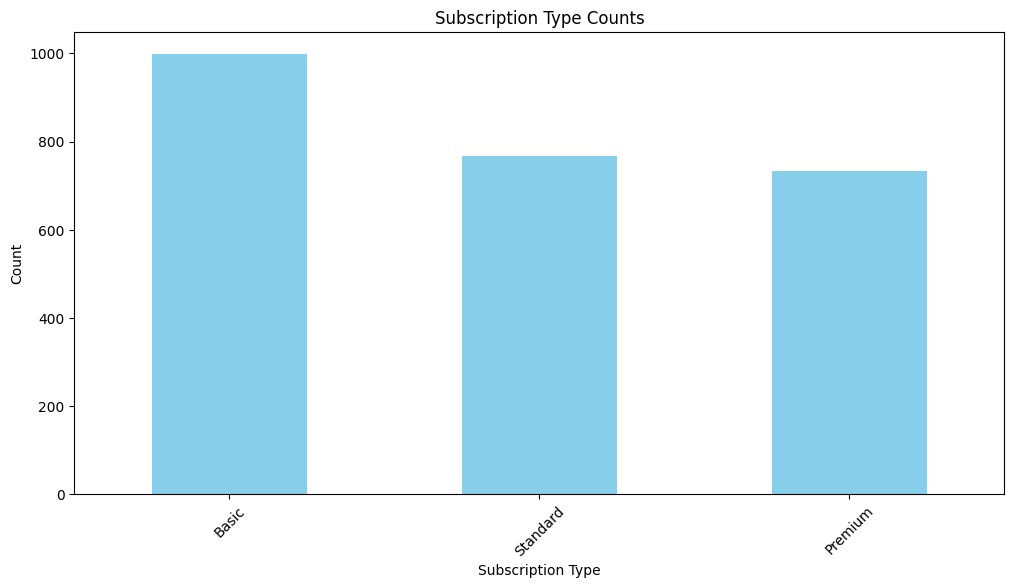

In [19]:
columns_titles = {
    
        'Gender': 'Gender Counts',
        'Device': 'Device Counts',
        'Subscription Type': 'Subscription Type Counts'
}

for column, title in columns_titles.items():
    plt. figure(figsize=(12, 6))
    df [column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [22]:
user_counts_by_country = df['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country', 'User Count']

import plotly.express as px

In [21]:
!pip install plotly.express

   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------  17.3/17.3 MB 83.9 MB/s eta 0:00:01
   ---------------------------------------- 17.3/17.3 MB 64.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ------------- -------------------------- 14.9/44.5 MB 67.3 MB/s eta 0:00:01
   ------------------------ --------------- 27.5/44.5 MB 67.2 MB/s eta 0:00:01
   -------------------------------- ------- 36.2/44.5 MB 57.5 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 53.2 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 45.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------------------------- ------- 7.9/9.8 MB 37.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 32.2 MB/s eta 0:00:00


In [60]:
fig = px.choropleth(user_counts_by_country, locations='Country', locationmode='country names', color='User Count',
                    hover_name='Country', title='User Distribution by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    width=1000, # Adjust the width 
    height=700, # Adjust the height
    title_font_size=24,
    geo=dict(
        showframe=False, 
        showcoastlines=False,
    ) 
)

fig.show()

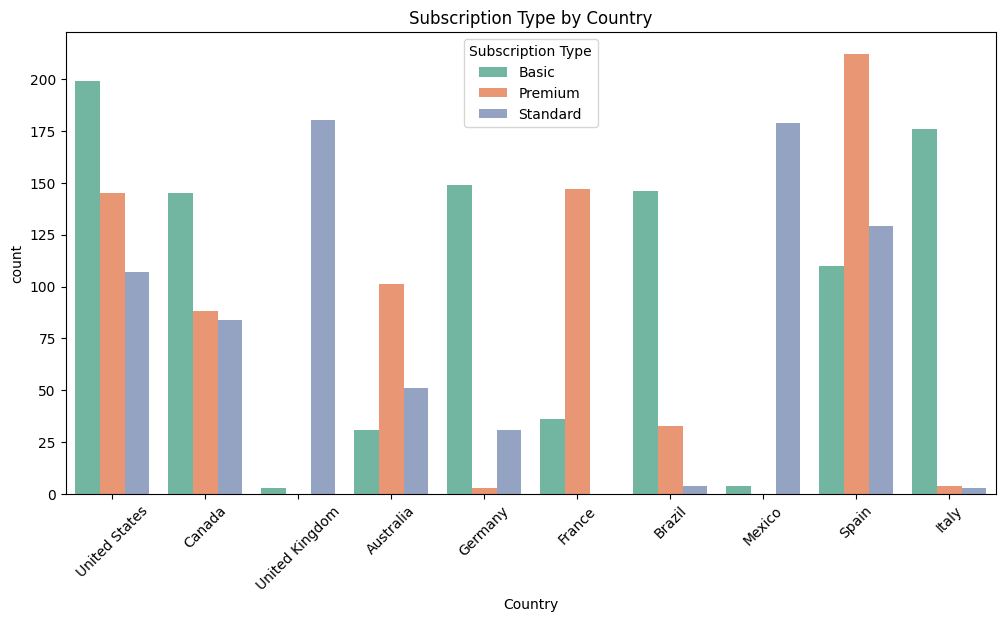

In [25]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x='Country', hue='Subscription Type', data=df, palette='Set2') 
plt.title('Subscription Type by Country')
plt.xticks(rotation=45) 
plt.show()

In [27]:
subs_by_country = df.pivot_table(index='Country', columns='Subscription Type', values='User ID', aggfunc='count', fill_value=0)

In [28]:
subs_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [29]:
subs_by_country['Total'] = subs_by_country.sum(axis = 1)

In [30]:
subs_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


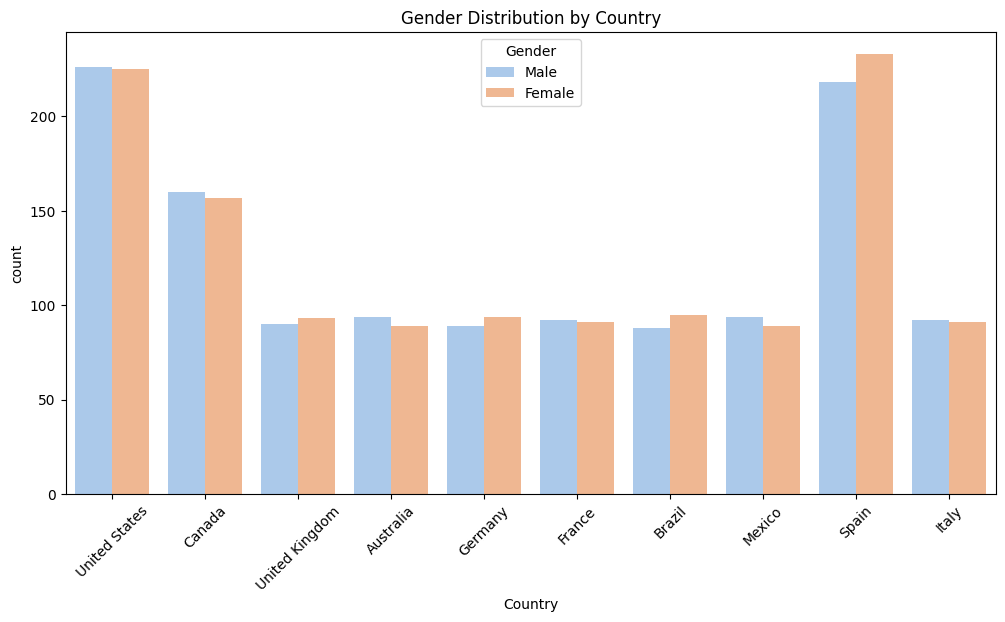

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel') 
plt.title('Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [33]:
gender_by_country = df.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)
gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [35]:
subs_by_country_gender = df.pivot_table(index="Country",
                                        columns=['Subscription Type','Gender'], 
                                        values='User ID', aggfunc='count', fill_value=0) 
subs_by_country_gender

Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

In [38]:
subs_by_country_gender2 = df.pivot_table(index=['Country', 'Gender'], columns='Subscription Type',
                                         values='User ID', aggfunc='count', fill_value=0)
subs_by_country_gender2

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57

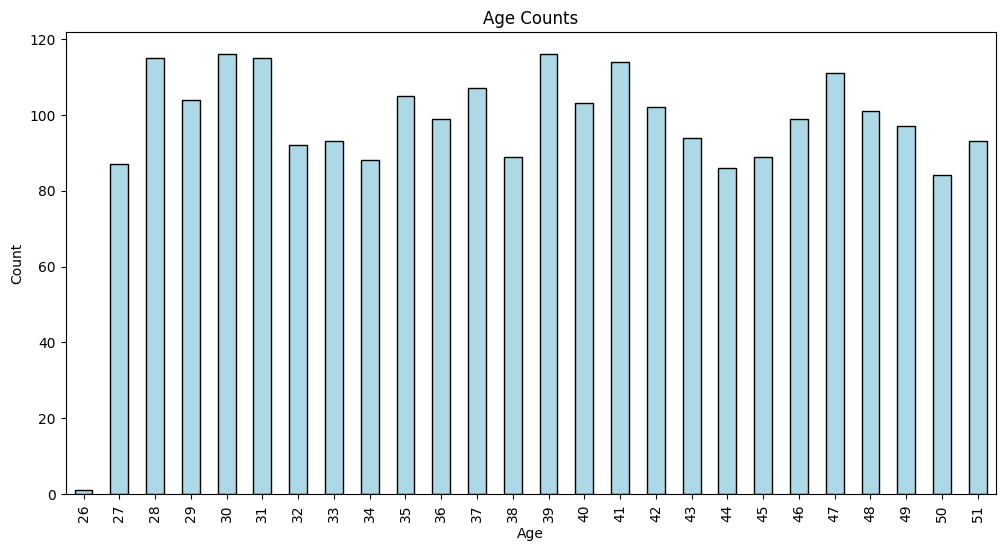

In [40]:
plt.figure(figsize=(12, 6)) 
df['Age'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Age Counts')
plt.xlabel('Age') 
plt.ylabel('Count')
plt.show()

In [50]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months,LTV
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


In [42]:
df ['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

In [43]:
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days

In [44]:
df['Duration Months'] = df['Duration'].apply(lambda x: math.ceil(x / 30))

In [46]:
average_duration = df['Duration Months'].mean()

In [47]:
print(f"Average Duration: {average_duration}")

Average Duration: 10.7808


In [49]:
df['LTV'] = df['Monthly Revenue'] * df['Duration Months']

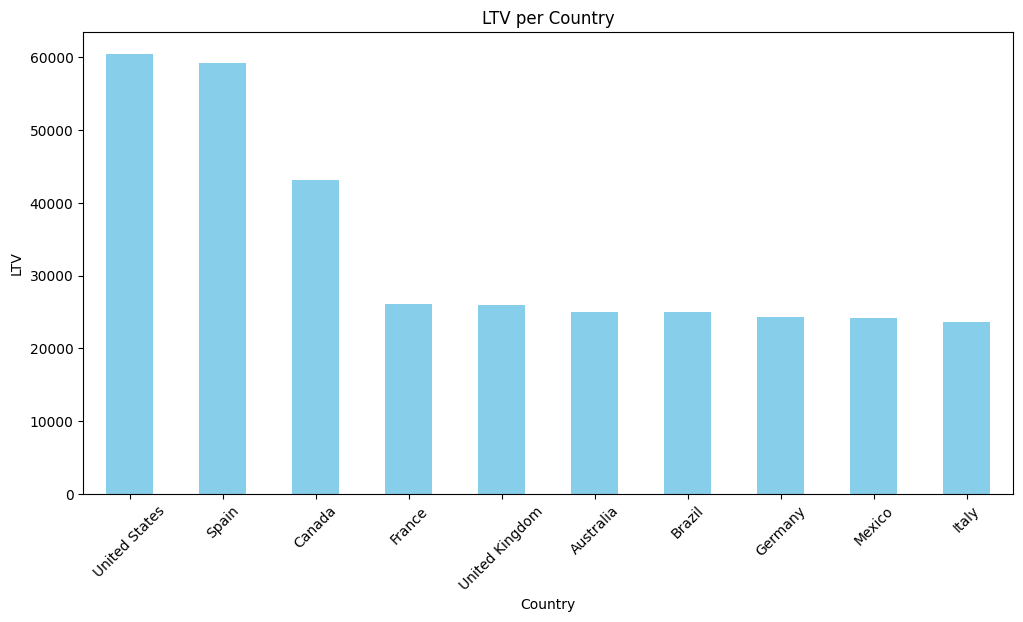

In [56]:
ltv_per_country_sum = df.groupby('Country')['LTV'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6)) 
ltv_per_country_sum.plot(kind='bar', color='skyblue')
plt.title('LTV per Country') 
plt.xlabel('Country')
plt.ylabel('LTV') 
plt.xticks(rotation=45) 
plt.show()

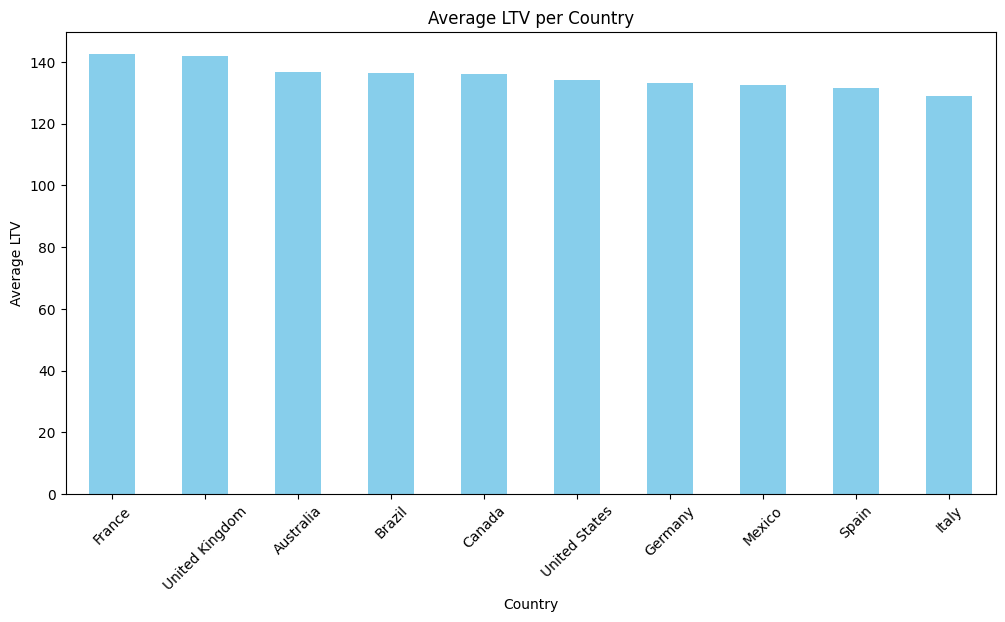

In [57]:
ltv_per_country_sum = df.groupby('Country')['LTV'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6)) 
ltv_per_country_sum.plot(kind='bar', color='skyblue')
plt.title('Average LTV per Country') 
plt.xlabel('Country')
plt.ylabel('Average LTV') 
plt.xticks(rotation=45) 
plt.show()

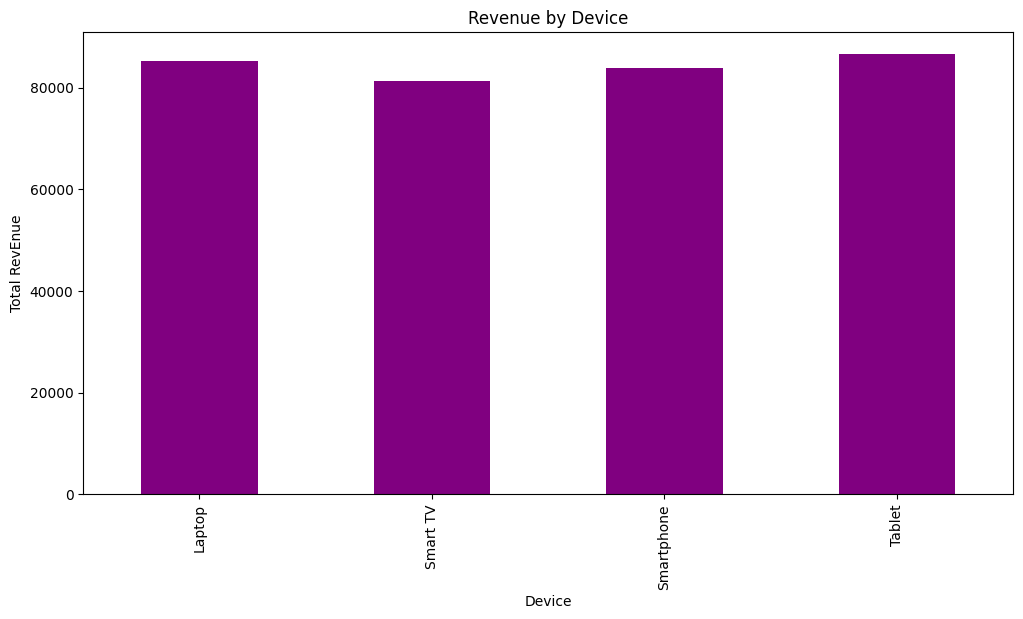

In [58]:
revenue_by_device = df.groupby('Device')['LTV'].sum()

plt.figure(figsize=(12, 6))
revenue_by_device.plot(kind='bar', color='purple') 
plt.title('Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Total RevEnue') 
plt.show()

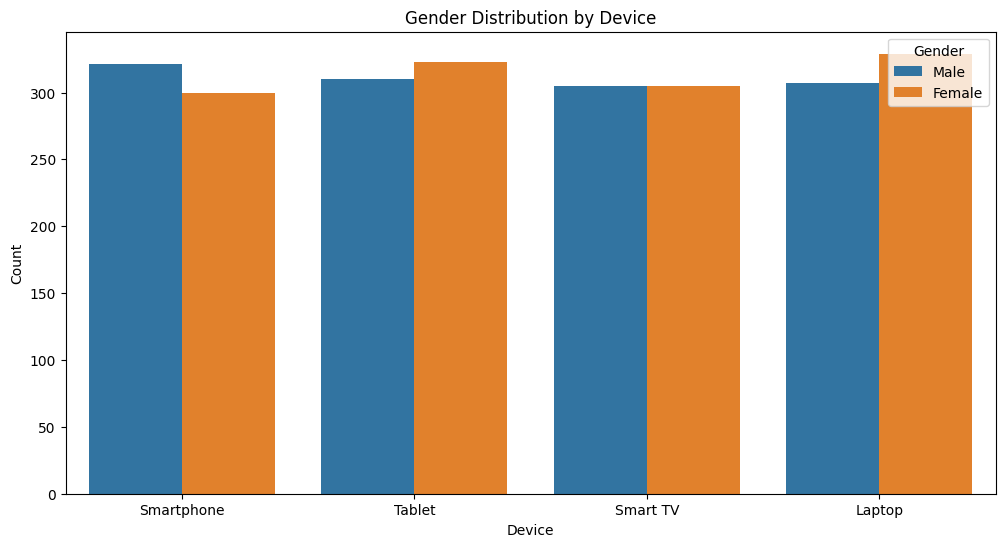

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot (x='Device', hue='Gender', data=df) 
plt.title('Gender Distribution by Device') 
plt.xlabel('Device') 
plt.ylabel('Count') 
plt.show() 